# 🍷🍇 Analisis de vino

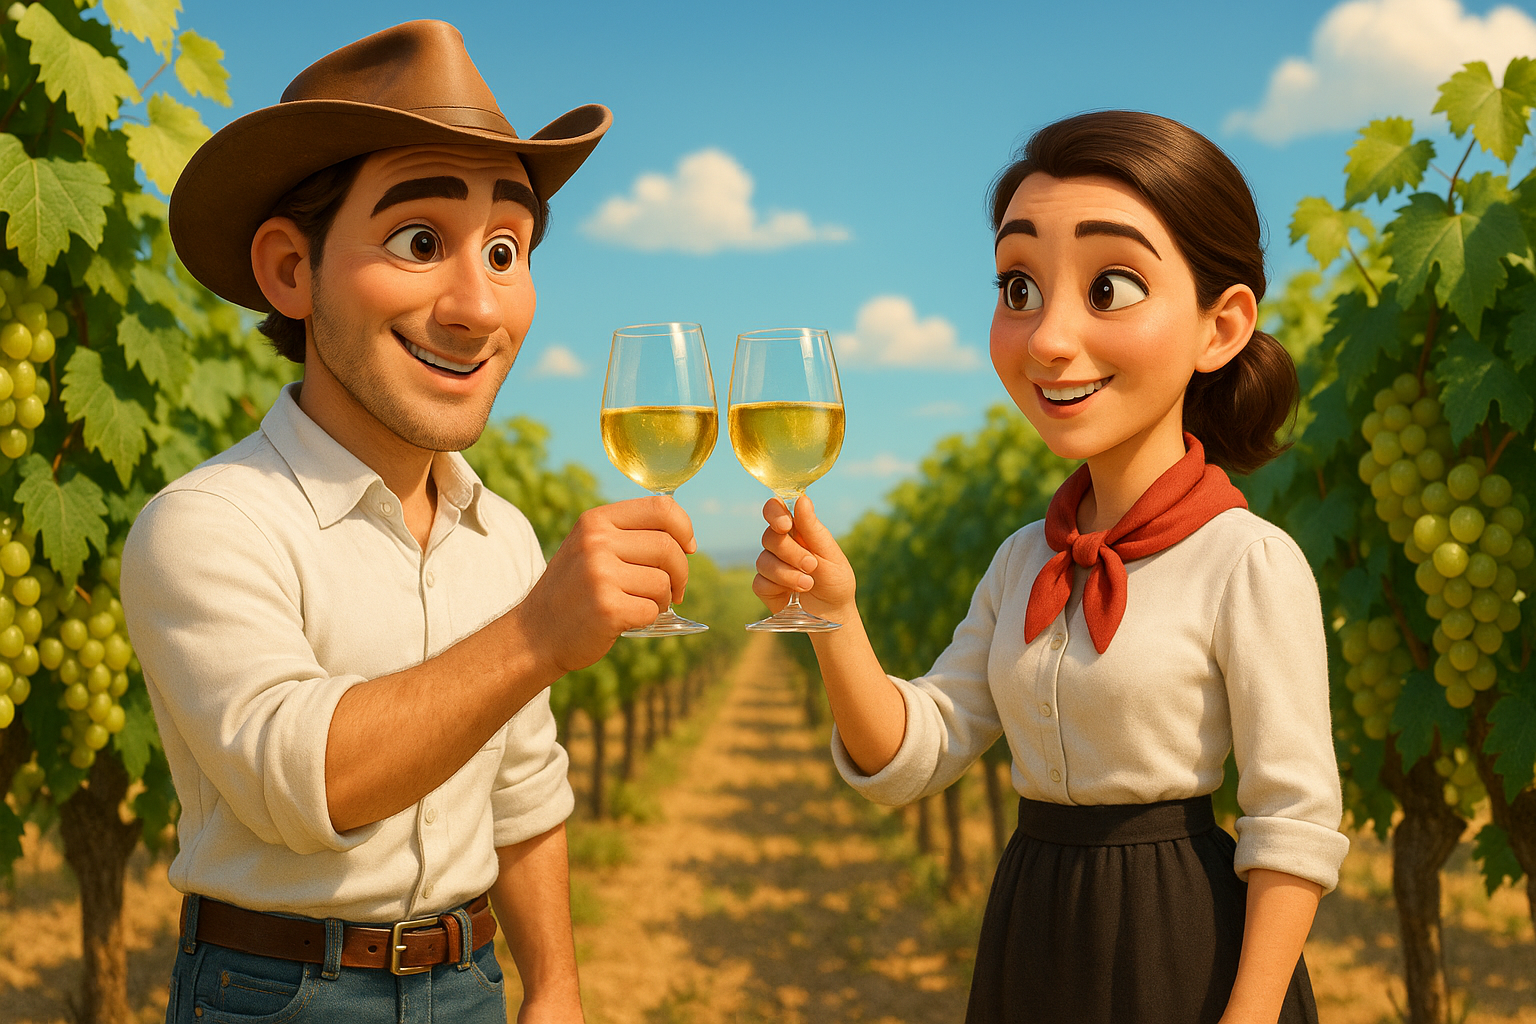

# 📚 Librerias

In [23]:
import pandas as pd
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Para prueba de Normalidad
from scipy.stats import shapiro, kstest, norm, normaltest
#Prueba no parametrica Mann-Witney U 
from scipy.stats import mannwhitneyu


# 📄📥 Cargar el archivo

In [24]:
wine_white = "winequality-white.csv"
df = pd.read_csv(wine_white)
df.head(6)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine strain
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Sauvignon Blanc
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Chardonnay
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Chardonnay
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Chardonnay
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Sauvignon Blanc
5,5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Sauvignon Blanc


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed acidity         4898 non-null   float64
 2   volatile acidity      4898 non-null   float64
 3   citric acid           4898 non-null   float64
 4   residual sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
 13  wine strain           4898 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 535.8+ KB


## 🔍 Explorar datos Nulos NaN 

In [26]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine strain             0
dtype: int64

# 🧪 Prueba de hipotesis

## 🎯 Resolver problema 1 

Se desea comprobar si el promedio de acidez fija (fixed acidity) es mayor en los vinos Chardonnay que en los vinos Sauvignon Blanc. Formule una prueba de hipótesis y estudie está afirmación.

Se debe conocer la distribcuión Normal de la acidez fija en los vinos Chardonnay y Sauvignon Blanc

### **🔔 Analisis Distribución Normal**

In [27]:
sauvignon = df[df["wine strain"] == "Sauvignon Blanc"]["fixed acidity"]
chardonnay = df[df["wine strain"] == "Chardonnay"]["fixed acidity"]

#### **⚖️ Medidas de tendencia central**

In [28]:
sauvignon.describe()

count    2477.000000
mean        6.855349
std         0.855004
min         3.800000
25%         6.300000
50%         6.800000
75%         7.400000
max        14.200000
Name: fixed acidity, dtype: float64

In [29]:
chardonnay.describe()

count    1480.000000
mean        6.850068
std         0.829801
min         4.200000
25%         6.300000
50%         6.800000
75%         7.300000
max        10.700000
Name: fixed acidity, dtype: float64

In [30]:
m_ch=chardonnay.mean()
m_sa=sauvignon.mean()
print(f"La media de la acidez fija en ambos datos es de {round(m_ch,2)} g/L para la producción de Chardonnay y {round(m_sa,2)} g/L para la producción de Sauvignono Blanc")

La media de la acidez fija en ambos datos es de 6.85 g/L para la producción de Chardonnay y 6.86 g/L para la producción de Sauvignono Blanc


#### **🧮 Cantidad de datos**

In [31]:
chardonnay.info()
sauvignon.info()

<class 'pandas.core.series.Series'>
Index: 1480 entries, 1 to 4884
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
1480 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB
<class 'pandas.core.series.Series'>
Index: 2477 entries, 0 to 4897
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
2477 non-null   float64
dtypes: float64(1)
memory usage: 38.7 KB


#### **📊 Gráfico de normalidad**

In [ ]:
def graf_normalidad(data,color,nombre,media,nombre_ejex,nombre_ejey):
    sns.histplot(data,bins=30,kde=True,color=color)
    plt.title(f"Distribución Normal de la acidez Fija en la producción de {nombre}")
    plt.axvline(media,color='magenta',label=f'Media = {round(media,3)}') # plt.axhline= linea horizontal, plt.axvline= linea vertical
    plt.xlabel(nombre_ejex)
    plt.ylabel(nombre_ejey)
    plt.grid(True)
    plt.show()

**🍋🌿🧊 Sauvignon Blanc**

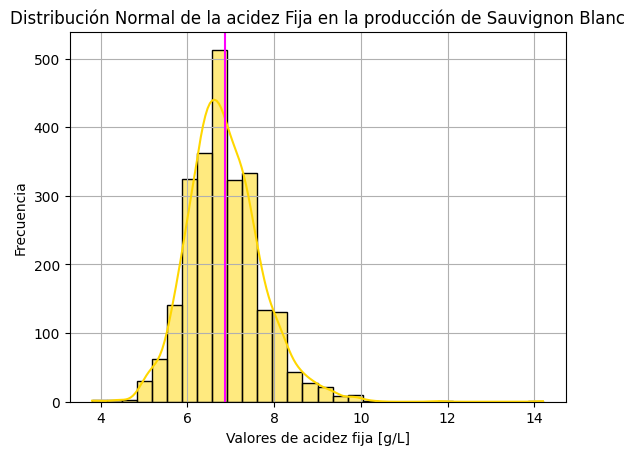

In [58]:
graf_normalidad(data=sauvignon,color="gold",nombre="Sauvignon Blanc",media=m_sa,nombre_ejex="Valores de acidez fija [g/L]",nombre_ejey="Frecuencia")

#### **📊 Gráfico de normalidad**

**🍏🧈🌞 Chardonnay**

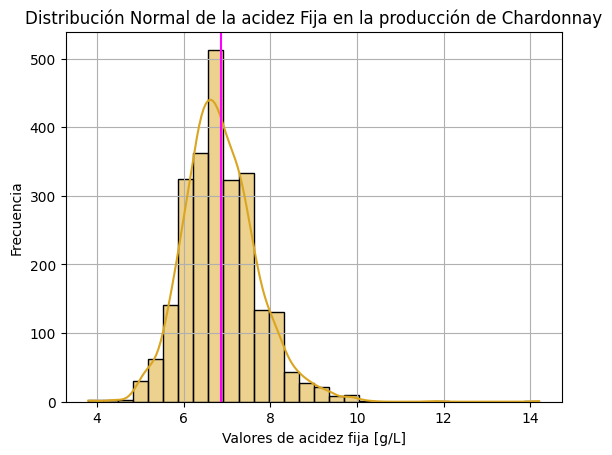

In [59]:
graf_normalidad(data=sauvignon,color="goldenrod",nombre="Chardonnay",media=m_ch,nombre_ejex="Valores de acidez fija [g/L]",nombre_ejey="Frecuencia")

#### **🧪 Test de Normalidad: Shapiro-Wilk, Kolmogorov-Smirnov y D'Agostino-Pearson** 

In [61]:
def test_normal(data,nombre):
    print(f"Pruebas de Normalidad {nombre}")
    # 🧪 Test de Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(data)
    print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p = {p_shapiro:.4f}")
    if p_shapiro > 0.05:
        print("✅ Shapiro-Wilk: Normalidad NO rechazada.")
    else:
        print("❌ Shapiro-Wilk: Se rechaza normalidad.")

    # 📈 Test de Kolmogorov-Smirnov (ajustado a N(μ, σ))
    mu, sigma = np.mean(data), np.std(data)
    stat_ks, p_kstest = kstest(data, 'norm', args=(mu, sigma))
    print(f"Kolmogorov-Smirnov: Estadístico = {stat_ks:.4f}, p = {p_kstest:.4f}")
    if p_kstest > 0.05:
        print("✅ Kolmogorov-Smirnov: Normalidad NO rechazada.")
    else:
        print("❌ Kolmogorov-Smirnov: Se rechaza normalidad.")

    # 📉 D’Agostino y Pearson (normaltest)
    stat_nt, p_normaltest = normaltest(data)
    print(f"D’Agostino-Pearson: Estadístico = {stat_nt:.4f}, p = {p_normaltest:.4f}")
    if p_normaltest > 0.05:
        print("✅ Normaltest: Normalidad NO rechazada.")
    else:
        print("❌ Normaltest: Se rechaza normalidad.")

**🍏🧈🌞 Chardonnay**

In [64]:
test_normal(chardonnay,"🍏🧈🌞 Chardonnay")


Pruebas de Normalidad 🍏🧈🌞 Chardonnay
Shapiro-Wilk: Estadístico = 0.9807, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0681, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 99.4113, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


**🍋🌿🧊 Sauvignon Blanc**

In [63]:
test_normal(sauvignon,"🍋🌿🧊 Sauvignon Blanc")

Pruebas de Normalidad 🍋🌿🧊 Sauvignon Blanc
Shapiro-Wilk: Estadístico = 0.9715, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0652, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 372.1490, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


#### ✅ Conclusión
A pesar de que la visualización mediante el gráfico KDE sugiere una distribución aproximadamente normal para los valores de acidez fija en ambas cepas de vino, los resultados obtenidos a partir de las pruebas formales de normalidad (Shapiro-Wilk, D’Agostino-Pearson, y Anderson-Darling) no permiten asumir que estas distribuciones sigan una distribución normal con un nivel de significancia del 5%. Esta discrepancia evidencia la importancia de complementar los análisis visuales con pruebas estadísticas. Por esta razón, se procederá a utilizar un diagrama de caja (boxplot) para examinar la presencia de valores atípicos (outliers) y analizar la dispersión de los datos de forma no paramétrica, lo que permitirá tomar decisiones más robustas en ausencia de normalidad.

#### **📦 Analisis de outliers**

 **🍏🧈🌞 Chardonnay**

C:\Users\guill\AppData\Local\Temp\ipykernel_20812\2020165963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wine strain", y="fixed acidity", data=df, palette=["gold", "goldenrod"])
C:\Users\guill\AppData\Local\Temp\ipykernel_20812\2020165963.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="wine strain", y="fixed acidity", data=df, palette=["gold", "goldenrod"])


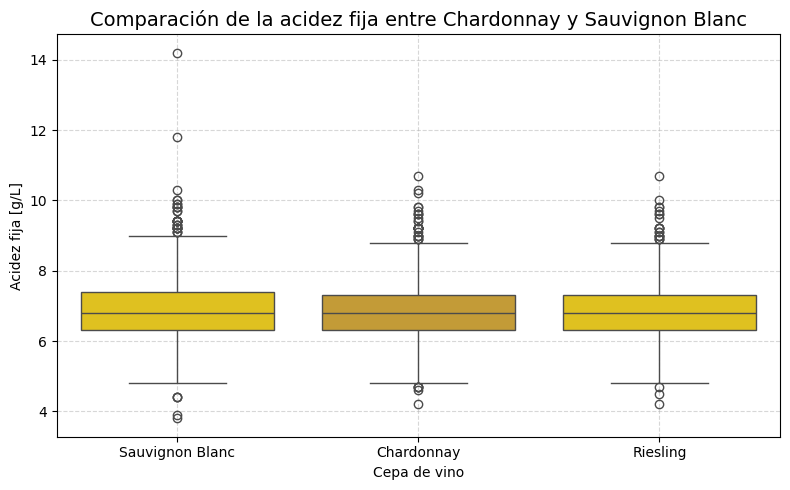

In [65]:
plt.figure(figsize=(8, 5))

# Eje x = tipo de vino, eje y = acidez fija
sns.boxplot(x="wine strain", y="fixed acidity", data=df, palette=["gold", "goldenrod"])

plt.title("Comparación de la acidez fija entre Chardonnay y Sauvignon Blanc", fontsize=14)
plt.xlabel("Cepa de vino")
plt.ylabel("Acidez fija [g/L]")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### ✅📦 Conclusión
A partir del gráfico boxplot podemos observar que existen outliers que deben ser eliminados, ya que podrían influir significativamente en las medidas de tendencia central y dispersión de los datos. Estos valores atípicos, al estar muy alejados del rango intercuartílico, pueden distorsionar el análisis estadístico y llevar a conclusiones incorrectas, especialmente en pruebas de hipótesis. Por ello, se aplicará el método de eliminación de outliers basado en el rango intercuartílico (IQR), lo que permitirá trabajar con un conjunto de datos más representativo y robusto para el análisis comparativo entre las cepas de vino Chardonnay y Sauvignon Blanc.

#### **🧼 Limpieza de outliers**

In [66]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los valores dentro del rango
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data


In [67]:
df_clean = pd.concat([
    remove_outliers_iqr(df[df["wine strain"] == "Chardonnay"], "fixed acidity"),
    remove_outliers_iqr(df[df["wine strain"] == "Sauvignon Blanc"], "fixed acidity")
])

In [68]:
df_sauvignon = df[df["wine strain"] == "Sauvignon Blanc"]
df_sauvignon_limpio = remove_outliers_iqr(df_sauvignon, "fixed acidity")

# Número de outliers eliminados
outliers_eliminados = len(df_sauvignon) - len(df_sauvignon_limpio)

print(f"Outliers eliminados en Sauvignon Blanc: {outliers_eliminados}")
df_chardonnay = df[df["wine strain"] == "Chardonnay"]
df_chardonnay_limpio = remove_outliers_iqr(df_chardonnay, "fixed acidity")

outliers_chardonnay = len(df_chardonnay) - len(df_chardonnay_limpio)
print(f"Outliers eliminados en Chardonnay: {outliers_chardonnay}")


Outliers eliminados en Sauvignon Blanc: 40
Outliers eliminados en Chardonnay: 36


C:\Users\guill\AppData\Local\Temp\ipykernel_20812\4090073030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wine strain", y="fixed acidity", data=df_clean, palette=["gold", "goldenrod"])


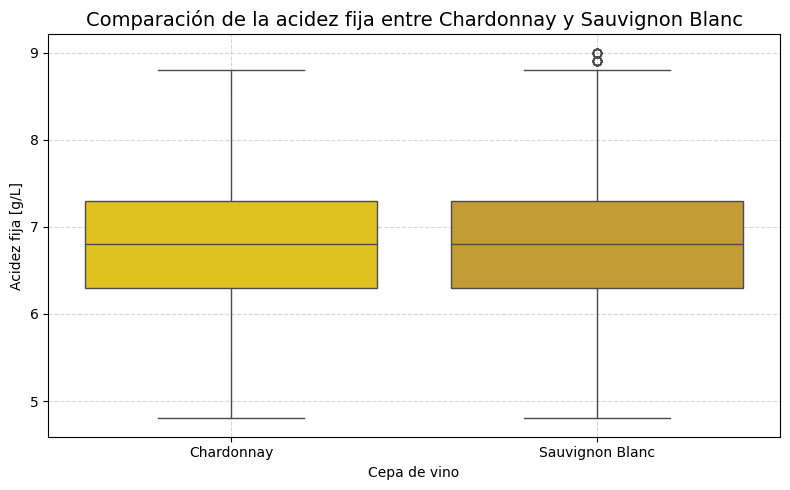

In [40]:
plt.figure(figsize=(8, 5))

# Eje x = tipo de vino, eje y = acidez fija
sns.boxplot(x="wine strain", y="fixed acidity", data=df_clean, palette=["gold", "goldenrod"])

plt.title("Comparación de la acidez fija entre Chardonnay y Sauvignon Blanc", fontsize=14)
plt.xlabel("Cepa de vino")
plt.ylabel("Acidez fija [g/L]")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### 🔔 Prueba de Normalidad sin outliers

In [41]:
# Filtrar los datos limpios por cepa
chardonnay_clean = df_clean[df_clean["wine strain"] == "Chardonnay"]["fixed acidity"]
sauvignon_clean = df_clean[df_clean["wine strain"] == "Sauvignon Blanc"]["fixed acidity"]

In [69]:
test_normal(chardonnay_clean,"🍏🧈🌞 Chardonnay")

Pruebas de Normalidad 🍏🧈🌞 Chardonnay
Shapiro-Wilk: Estadístico = 0.9940, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0550, p = 0.0003
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 7.1093, p = 0.0286
❌ Normaltest: Se rechaza normalidad.


In [70]:
test_normal(sauvignon_clean,"🍋🌿🧊 Sauvignon Blanc")

Pruebas de Normalidad 🍋🌿🧊 Sauvignon Blanc
Shapiro-Wilk: Estadístico = 0.9927, p = 0.0000
❌ Shapiro-Wilk: Se rechaza normalidad.
Kolmogorov-Smirnov: Estadístico = 0.0566, p = 0.0000
❌ Kolmogorov-Smirnov: Se rechaza normalidad.
D’Agostino-Pearson: Estadístico = 23.9987, p = 0.0000
❌ Normaltest: Se rechaza normalidad.


#### ✅ Conclusión 

Si los datos no cumplen con los supuestos de normalidad incluso después de eliminar outliers, entonces la prueba de hipótesis debe basarse en métodos no paramétricos, ya que:

> ❌ No se puede usar t-test (prueba t de Student), porque requiere que las muestras sigan una distribución aproximadamente normal.

**Alternativa correcta: Prueba de Mann–Whitney U**

Es una prueba no paramétrica que compara dos muestras independientes para determinar si una tiende a tener valores mayores que la otra.

#### 📌 Formulación de la hipótesis

Queremos saber si **Chardonnay tiene mayor acidez fija** que Sauvignon Blanc, así que planteamos una prueba **unilateral** (cola derecha):

* **H₀ (hipótesis nula):**
  $\text{Mediana}_{\text{Chardonnay}} \leq \text{Mediana}_{\text{Sauvignon Blanc}}$

* **H₁ (hipótesis alternativa):**
  $\text{Mediana}_{\text{Chardonnay}} > \text{Mediana}_{\text{Sauvignon Blanc}}$


#### 🧪 Código en Python con `scipy.stats.mannwhitneyu`


In [71]:
stat, p_value = mannwhitneyu(chardonnay_clean, sauvignon_clean, alternative='greater')

print(f"Estadístico U: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Se rechaza H₀: Chardonnay tiene mayor acidez fija.")
else:
    print("❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmar que Chardonnay tiene mayor acidez fija.")

Estadístico U: 1752115.5000
Valor p: 0.5869
❌ No se puede rechazar H₀: No hay evidencia suficiente para afirmar que Chardonnay tiene mayor acidez fija.


#### ✅ Conclusión 
A partir de la prueba no paramétrica de Mann–Whitney U, se obtuvo un estadístico U = 1.752.115,5 y un valor p = 0.5869. Dado que el valor p es considerablemente mayor al nivel de significancia habitual (α = 0.05), no se rechaza la hipótesis nula. Esto indica que no existe evidencia estadísticamente significativa para afirmar que la acidez fija en los vinos Chardonnay es mayor que en los vinos Sauvignon Blanc. Por lo tanto, en base a los datos analizados y considerando la falta de normalidad, no se puede concluir que exista una diferencia en acidez fija favorable al Chardonnay.

## 🎯 Resolver problema 2 

Compare el promedio de alcohol entre vinos de calidad superior (calidad >= 7) y vinos de calidad
media (calidad 5 - 6). ¿Existe evidencia suficiente para afirmar que los vinos de calidad superior
tienen mayor contenido de alcohol?